# Basic usage of the Python data_api module

This notebook shows some basic manipulations that can be done with this module. 

First, let's import the plotting library (`matplotlib`) with a cool style

In [1]:
%matplotlib nbagg
import matplotlib.pyplot as plt
plt.style.use('ggplot')

then, import the module, and create a `data_api` object

In [2]:
import data_api

dac = data_api.configure()

You can start by searching for channels, e.g.:

In [3]:
dac.search_channel('FOR-PHASE-AVG')

[{'backend': 'sf-databuffer',
  'channels': ['S10CB01-RBOC-DCP10:FOR-PHASE-AVG',
   'S10CB01-RIQM-DCP10:FOR-PHASE-AVG',
   'S10CB01-RKLY-DCP10:FOR-PHASE-AVG',
   'S10CB01-RPRE-DCP10:FOR-PHASE-AVG',
   'S10CB01-RWVG100-DCP10:FOR-PHASE-AVG',
   'S10CB01-RWVG200-DCP10:FOR-PHASE-AVG',
   'S10CB01-RWVG300-DCP10:FOR-PHASE-AVG',
   'S10CB01-RWVG400-DCP10:FOR-PHASE-AVG',
   'SINDI01-RIQM-DCP10:FOR-PHASE-AVG',
   'SINDI01-RKLY-DCP10:FOR-PHASE-AVG',
   'SINDI01-RPRE-DCP10:FOR-PHASE-AVG',
   'SINDI01-RWVG100-DCP10:FOR-PHASE-AVG',
   'SINEG01-RIQM-DCP10:FOR-PHASE-AVG',
   'SINEG01-RKLY-DCP10:FOR-PHASE-AVG',
   'SINEG01-RPRE-DCP10:FOR-PHASE-AVG',
   'SINEG01-RWVG100-DCP10:FOR-PHASE-AVG',
   'SINSB01-RIQM-DCP10:FOR-PHASE-AVG',
   'SINSB01-RKLY-DCP10:FOR-PHASE-AVG',
   'SINSB01-RPRE-DCP10:FOR-PHASE-AVG',
   'SINSB01-RWVG100-DCP10:FOR-PHASE-AVG',
   'SINSB02-RIQM-DCP10:FOR-PHASE-AVG',
   'SINSB02-RKLY-DCP10:FOR-PHASE-AVG',
   'SINSB02-RPRE-DCP10:FOR-PHASE-AVG',
   'SINSB02-RWVG100-DCP10:FOR-PHASE-AVG'

Then, you can get data from some channels, within a certain range. Ranges can be of type:
* `date`: e.g. "2016-07-26 16:00"
* `globalSeconds`
* `pulseId`

You can select a range start, end, or delta (two of the three). You can also decide if the table should be indexed accordingly to `date`, `globalSeconds` or `pulseId`

In [4]:
df = dac.get_data(channels=[
        'SINSB02-RIQM-DCP10:FOR-PHASE-AVG', 
        'SINDI01-RIQM-DCP10:FOR-PHASE-AVG', 
        'S10CB01-RIQM-DCP10:FOR-PHASE-AVG',
       ], 
                  start="2016-07-27 16:11", end="2016-07-27 16:12", 
                  index_field="date")

Then, let's just explore the first 5 elements:

In [5]:
df.head()

,SINSB02-RIQM-DCP10:FOR-PHASE-AVG,SINDI01-RIQM-DCP10:FOR-PHASE-AVG,S10CB01-RIQM-DCP10:FOR-PHASE-AVG
date,,,
2016-07-27 14:11:00.003908,-48.031060,58.474915,144.47670
2016-07-27 14:11:00.013908,-48.029030,58.474500,144.46846
2016-07-27 14:11:00.023908,-48.028538,58.476470,144.47505
2016-07-27 14:11:00.033908,-48.024765,58.477510,144.47835
2016-07-27 14:11:00.043908,-48.028206,58.473040,144.49373


## Plotting

Pandas comes with some nice plotting utilities based on `matplotlib`:

<IPython.core.display.Javascript object>


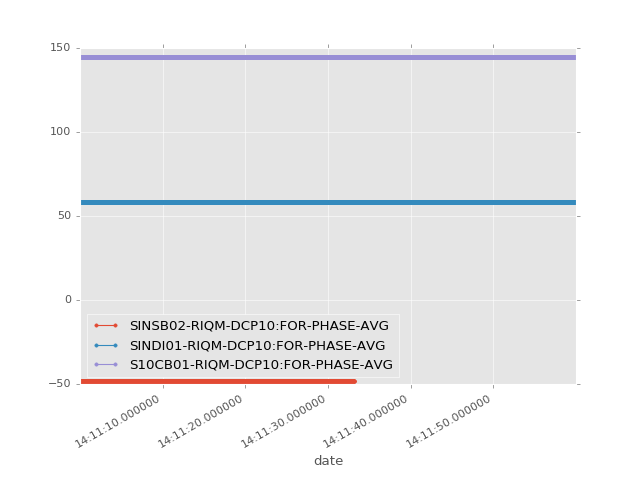

In [6]:
df.plot(style='.-')

Also, doing a *box* plot is extremely easy:

<IPython.core.display.Javascript object>


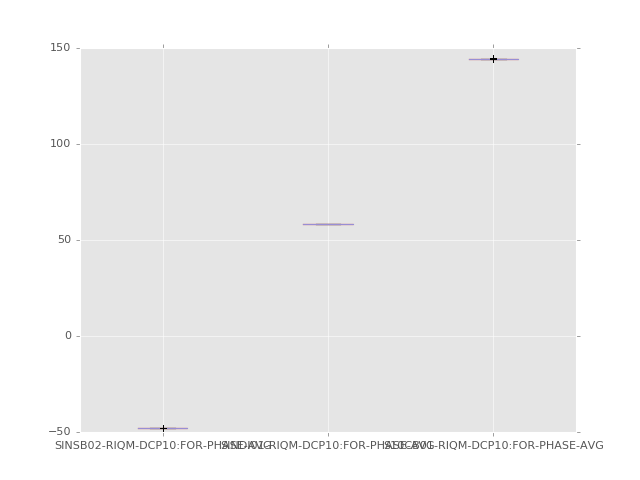

In [7]:
df.plot(kind='box')

There are also some tools for more complex plotting, like a *scatter matrix* plus KDE estimation:

<IPython.core.display.Javascript object>


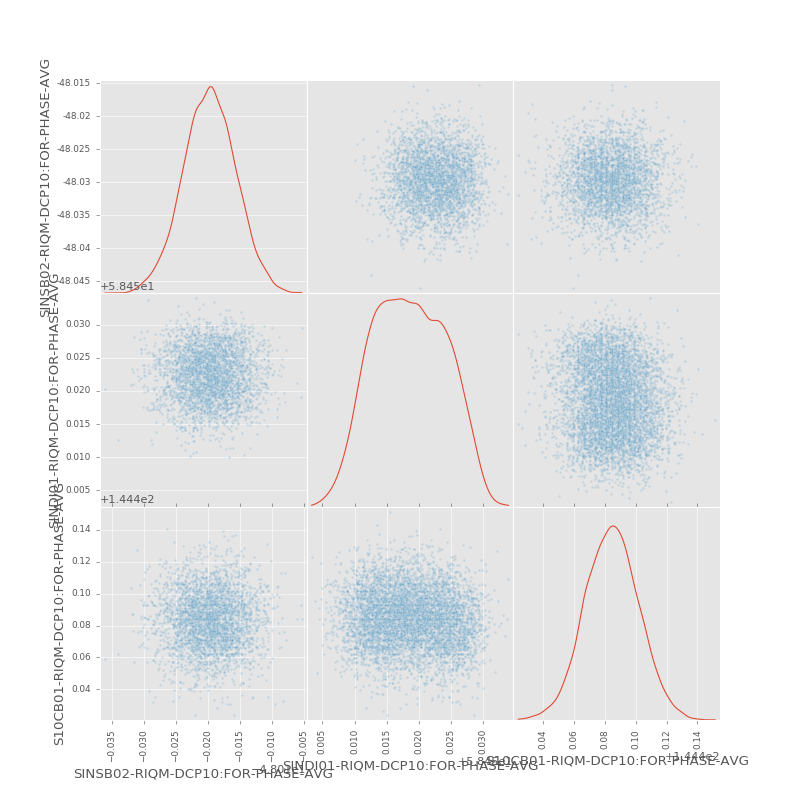

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5b5fb98080>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f5b5d0eae10>]], dtype=object)

In [8]:
from pandas.tools.plotting import scatter_matrix

scatter_matrix(df, alpha=0.2, figsize=(10, 10), diagonal='kde')

More examples can be found here: http://pandas.pydata.org/pandas-docs/stable/visualization.html

## Data reduction

You can reduce the data using the API (NB: at the moment, client side aggregation is always performed: this will change in the future):
* first, you configure the aggregation
* then, you retrieve data

In [9]:
dac.set_aggregation(aggregations=["min", "mean", "max"], pulses_per_bin=100)
df_red = dac.get_data(channels=[
        'SINSB02-RIQM-DCP10:FOR-PHASE-AVG', 
        'SINDI01-RIQM-DCP10:FOR-PHASE-AVG', 
        'S10CB01-RIQM-DCP10:FOR-PHASE-AVG',
       ], 
                  start="2016-07-27 16:11", end="2016-07-27 16:12", 
                  index_field="pulseId")

60
min


/home/sala/Programs/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


mean
max


In [10]:
df_red.columns

Index(['SINSB02-RIQM-DCP10:FOR-PHASE-AVG:min',
       'SINDI01-RIQM-DCP10:FOR-PHASE-AVG:min',
       'S10CB01-RIQM-DCP10:FOR-PHASE-AVG:min',
       'SINSB02-RIQM-DCP10:FOR-PHASE-AVG:mean',
       'SINDI01-RIQM-DCP10:FOR-PHASE-AVG:mean',
       'S10CB01-RIQM-DCP10:FOR-PHASE-AVG:mean',
       'SINSB02-RIQM-DCP10:FOR-PHASE-AVG:max',
       'SINDI01-RIQM-DCP10:FOR-PHASE-AVG:max',
       'S10CB01-RIQM-DCP10:FOR-PHASE-AVG:max'],
      dtype='object')

<IPython.core.display.Javascript object>


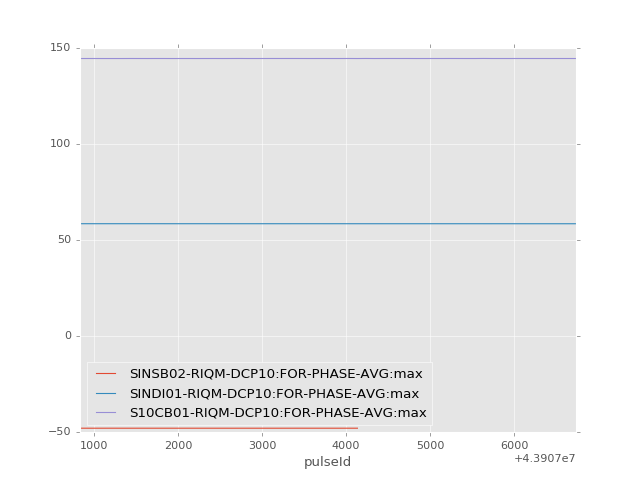

In [27]:
quantities = ['SINSB02-RIQM-DCP10:FOR-PHASE-AVG:max',
       'SINDI01-RIQM-DCP10:FOR-PHASE-AVG:max',
       'S10CB01-RIQM-DCP10:FOR-PHASE-AVG:max']
df_red[quantities].plot()

You can also do a lot of statistics directly on the client! In case you are wondering about mean and standard deviation of the sample:

In [29]:
df.mean(), df.std()

(SINSB02-RIQM-DCP10:FOR-PHASE-AVG    -48.029730
 SINDI01-RIQM-DCP10:FOR-PHASE-AVG     58.468576
 S10CB01-RIQM-DCP10:FOR-PHASE-AVG    144.484548
 dtype: float64, SINSB02-RIQM-DCP10:FOR-PHASE-AVG    0.004088
 SINDI01-RIQM-DCP10:FOR-PHASE-AVG    0.005572
 S10CB01-RIQM-DCP10:FOR-PHASE-AVG    0.017284
 dtype: float64)

You can also rebin the data, and compute various statistical quantities on each bin:

In [15]:
import numpy as np

# Define pulses per bin
pulsesPerBin = 100

# get an array which tells which bin number an entry belongs to
bin_mask = np.array([i // pulsesPerBin for i in range(len(df.index))])
# get the actual bin boundaries
bins = df.index[[0, ] + (1 + np.where((bin_mask[1:] - bin_mask[0:-1]) == 1)[0]).tolist()]
# group the dataframe
groups = df.groupby(bin_mask)

In [17]:
# see some statistical properties
groups.describe()

/home/sala/Programs/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


SINSB02-RIQM-DCP10:FOR-PHASE-AVG  SINDI01-RIQM-DCP10:FOR-PHASE-AVG  \
0  count                        100.000000                        100.000000   
   mean                         -48.029138                         58.476526   
   std                            0.004016                          0.002495   
   min                          -48.039455                         58.467888   
   25%                          -48.031642                         58.475171   
   50%                          -48.028609                         58.476551   
   75%                          -48.026139                         58.477882   
   max                          -48.018803                         58.483948   
1  count                        100.000000                        100.000000   
   mean                         -48.030343                         58.476973   
   std                            0.003727                          0.002063   
   min                          -48.039260                         58.471184   
   25%                          -48.033072                         58.475406   
   50%                          -48.030553                         58.477037   
   75%                          -48.027540                         58.478482   
   max                          -48.021206                         58.482190   
2  count                        100.000000                        100.000000   
   mean                         -48.030410                         58.477021   
   std                            0.003453                          0.002374   
   min                          -48.039734                         58.470960   
   25%                          -48.032375                         58.475365   
   50%                          -48.030484                         58.477153   
   75%                          -48.028510                         58.478614   
   max                          -48.021767                         58.483463   
3  count                        100.000000                        100.000000   
   mean                         -48.028620                         58.477096   
   std                            0.004270                          0.002244   
   min                          -48.040490                         58.469480   
   25%                          -48.031308                         58.475930   
   50%                          -48.028441                         58.476925   
...                                    ...                               ...   
56 std                                 NaN                          0.002238   
   min                                 NaN                         58.456287   
   25%                                 NaN                         58.458924   
   50%                                 NaN                         58.460342   
   75%                                 NaN                         58.462388   
   max                                 NaN                         58.466347   
57 count                          0.000000                        100.000000   
   mean                                NaN                         58.460606   
   std                                 NaN                          0.002233   
   min                                 NaN                         58.454155   
   25%                                 NaN                         58.459318   
   50%                                 NaN                         58.460838   
   75%                                 NaN                         58.462050   
   max                                 NaN                         58.465730   
58 count                          0.000000                        100.000000   
   mean                                NaN                         58.460637   
   std                                 NaN                          0.002434   
   min                                 NaN                         58.454440   
   25%    

and then plot:

/home/sala/Programs/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


<IPython.core.display.Javascript object>


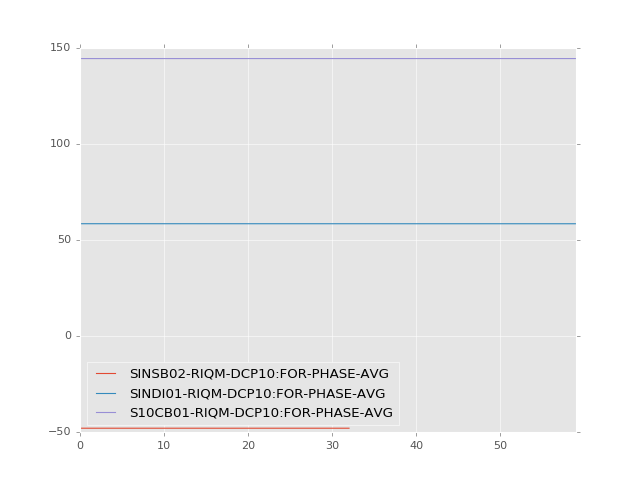

In [26]:
groups.describe().xs('75%', level=1).plot()
